# Exercise 1 #
Use the Wine dataset from sklearn:
- scale with `StandardScaler`
- apply `PCA`
- use `GradientBoostingClassifier`
- optimize hyperparameters with `RandomizedSearchCV`
- evaluate performance using `StratifiedKFold` to ensure class proportions are maintained

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

sns.set_theme(style="whitegrid")

In [30]:
data = load_wine()
x = data.data
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)

In [31]:
pipeline_scale_pca_gbc = Pipeline([('scale', StandardScaler()),('pca', PCA()),('gbc', GradientBoostingClassifier(random_state=123))])
param_grid = {'pca__n_components': [2,4,6,8], 'gbc__n_estimators': [100,200,300], 'gbc__learning_rate': [0.001,0.01,0.1], 'gbc__max_depth': [3,5,7], 'gbc__min_samples_split': [2,5,10]}

grid_search = RandomizedSearchCV(pipeline_scale_pca_gbc, param_grid, cv=StratifiedKFold(n_splits=5), n_iter=100, verbose=1, random_state=123, n_jobs=-1)
grid_search.fit(x_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'pca__n_components': 4, 'gbc__n_estimators': 200, 'gbc__min_samples_split': 2, 'gbc__max_depth': 3, 'gbc__learning_rate': 0.1}


In [32]:
# OUTPUT:

# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# Best parameters found: {'pca__n_components': 4, 'gbc__n_estimators': 200, 'gbc__min_samples_split': 2, 'gbc__max_depth': 3, 'gbc__learning_rate': 0.1}

In [33]:
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy = {100*accuracy:.2f}%")

Accuracy = 97.78%


In [34]:
report = classification_report(y_test,predictions,target_names=data.target_names)
print(f'Classification report:\n{report}')

Classification report:
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.97        15
     class_1       0.95      1.00      0.97        18
     class_2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [35]:
conf_mat = confusion_matrix(y_test,predictions)
print(conf_mat)

[[14  1  0]
 [ 0 18  0]
 [ 0  0 12]]


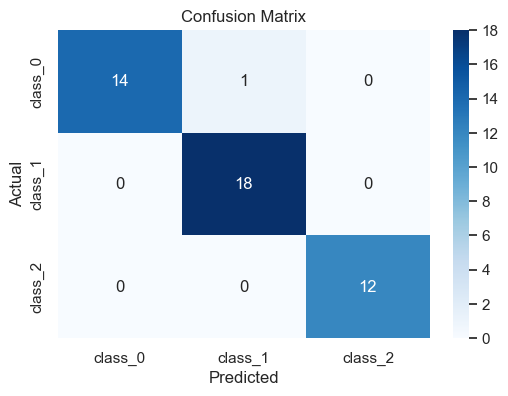

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Exercise 2 #
Use the Diabetes dataset from sklearn and run a linear regression to predict disease progression based on the 10 medical features provided.
- load with `sklearn.datasets.load_diabetes()`
- explore the datasets to understand the variables
- split the dataset into train+test
- apply `LinearRegression`
- evaluate performance showing `MSE` and `R2`
- analyze the results

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

sns.set_theme(style="whitegrid")

In [40]:
data = load_diabetes()
x = data.data
y = data.target

In [54]:
print(x.shape,y.shape)

(442, 10) (442,)


In [49]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [50]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [61]:
df = pd.DataFrame(x, columns=data.feature_names)
df['progression'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123)

In [65]:
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))

Coefficients: [  29.86776596 -244.71800399  496.94398559  316.10984437 -805.22595689
  447.64502499  110.57764843  279.56782309  683.82210035   77.44862371]
Intercept: 152.57263796494206
MSE: 2912.3162552445488
R2: 0.510162295758446


In [68]:
coefficients = pd.Series(data=model.coef_,index=data.feature_names)

In [73]:
coefficient_importance = coefficients.sort_values(ascending=False, key=abs)
print(coefficient_importance)

s1    -805.225957
s5     683.822100
bmi    496.943986
s2     447.645025
bp     316.109844
s4     279.567823
sex   -244.718004
s3     110.577648
s6      77.448624
age     29.867766
dtype: float64


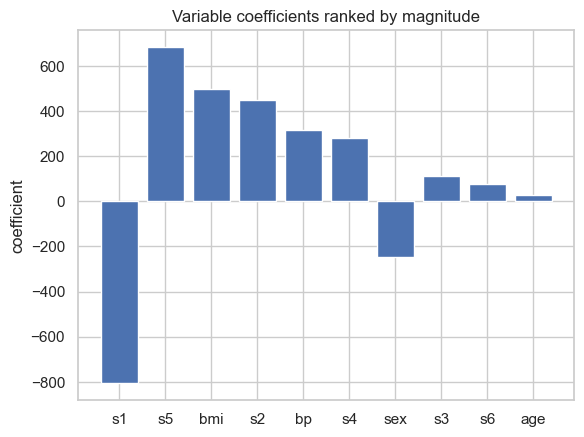

In [76]:
plt.figure()
plt.bar(coefficient_importance.index, coefficient_importance)
plt.xlabel('')
plt.ylabel('coefficient')
plt.title('Variable coefficients ranked by magnitude')
plt.show()

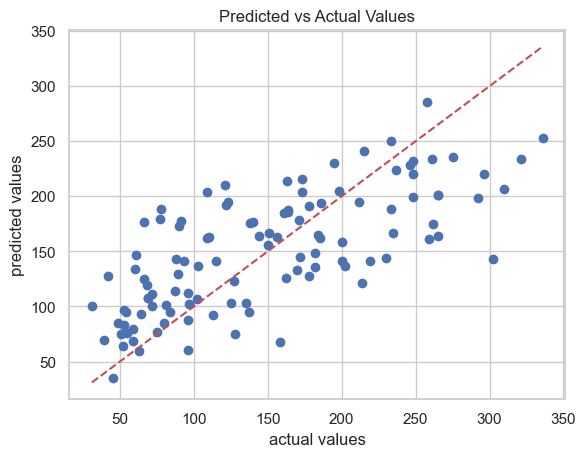

In [81]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predicted vs Actual Values')
plt.show()

# Exercise 3 #
Use the Iris dataset from sklearn and apply a k-means clustering algorithm.
- load with `sklearn.datasets.load_iris()`
- consider all 4 features for clustering
- set k=3 for the k-means
- visualize the clusters obtained on 2D plots using PCA
- compare these clusters to the real labels
- evaluate the adjusted rand score and the homogeneity score
- discuss the results

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,homogeneity_score

sns.set_theme(style="whitegrid")

In [100]:
data = load_iris()
x,y = data.data,data.target

In [101]:
pipeline_standardize_pca_kmeans = Pipeline([('standardize', StandardScaler()), ('pca', PCA(n_components=4)), ('kmeans', KMeans(n_clusters=3, random_state=42))])

pipeline_standardize_pca_kmeans.fit(x)

predictions = pipeline_standardize_pca_kmeans.predict(x)

In [90]:
x_standardized = StandardScaler().fit_transform(x)
x_pca = PCA(n_components=4).fit_transform(x_standardized)

In [94]:
print("Adjusted Rand Score:", adjusted_rand_score(y,predictions))
print("Homogeneity Score:", homogeneity_score(y,predictions))

Adjusted Rand Score: 0.432804702527474
Homogeneity Score: 0.534661805863406


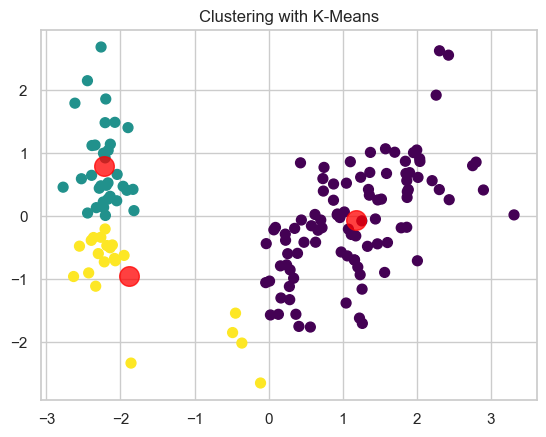

In [104]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=predictions, s=50, cmap='viridis')
centres = pipeline_standardize_pca_kmeans.named_steps['kmeans'].cluster_centers_
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clustering with K-Means')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

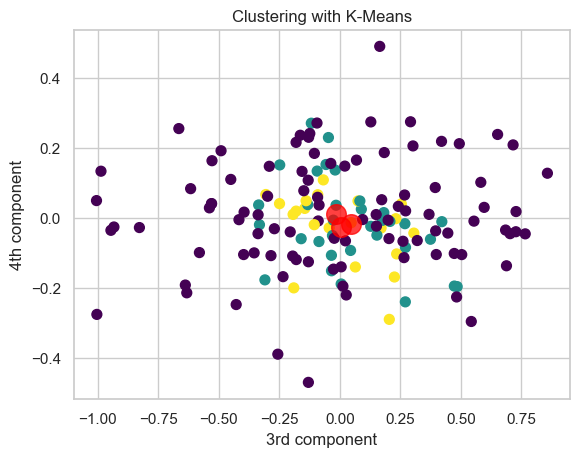

In [105]:
plt.scatter(x_pca[:, 2], x_pca[:, 3], c=predictions, s=50, cmap='viridis')
centres = pipeline_standardize_pca_kmeans.named_steps['kmeans'].cluster_centers_
plt.scatter(centres[:, 2], centres[:, 3], c='red', s=200, alpha=0.75)
plt.title('Clustering with K-Means')
plt.xlabel('3rd component')
plt.ylabel('4th component')
plt.show()